## Regression on Boston House dataset - Voulgari Eleni

### Step 1: Prepare Project

   1. Load libraries
   2. Load dataset

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Normalizer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.grid_search import GridSearchCV

In [4]:
boston_data = datasets.load_boston()  # Load the dataset and check the type to be able to procceed
type(boston_data)

sklearn.datasets.base.Bunch

### Step 2: Define Problem

##### What is your task? What are your goals? What do you want to achieve?

The task is to understand the nature of the dataset and the features it contains and then apply a set of machine learning algorithms to perform regression on it. The goal is to find the best regression algorithm and the best model for this specific dataset by evaluating each one of them.

### Step 3: Exploratory Analysis

##### Understand your data: Take a “peek” of your data, answer basic questions about the dataset. Summarise your data. Explore descriptive statistics and visualisations.

In [5]:
boston_data.keys()  # The Boston house dataset is loaded as a Bunch, which is a subclass of dict,
                  # thus it supports all the methods a dict does

['data', 'feature_names', 'DESCR', 'target']

Let's explore the content of each one  of the keys:

In [6]:
boston_data['feature_names']  # The names of the targets are shown below:

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='|S7')

In [7]:
boston_data['DESCR']

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [8]:
print boston_data['data']        # We observe that there are 13 columns, so there are 13 features for this dataset
print boston_data['data'].shape  # the number of the rows is the number of the samples (506, shape: (506,13)) 
                                 # The type of every attribute seem to be numeric.

[[  6.32000000e-03   1.80000000e+01   2.31000000e+00 ...,   1.53000000e+01
    3.96900000e+02   4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.96900000e+02   9.14000000e+00]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.92830000e+02   4.03000000e+00]
 ..., 
 [  6.07600000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   5.64000000e+00]
 [  1.09590000e-01   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.93450000e+02   6.48000000e+00]
 [  4.74100000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   7.88000000e+00]]
(506, 13)


In [9]:
print boston_data['target']  # The values of this array are the target values 
boston_data['target'].shape 

[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7  20.5  25.   23.4  18.9  35.4  24.7  31.6  23.3  19.6
  18.7  16.   22.2  25.   33.   23.5  19.4  22.   17.4  20.9  24.2  21.7
  22.8  23.4  24.1  21.4  20.   20.8  21.2  20.3  28.   23.9  24.8  22.9
  23.9  26.6  22.5  22.2  23.6  28.7  22.6  22.   22.9  25.   20.6  28.4
  21.4  38.7  43.8  33.2  27.5  26.5  18.6  19.3  20.1  19.5  19.5  20.4
  19.8  19.4  21.7  22.8  18.8  18.7  18.5  18.3  21.2  19.2  20.4  19.3
  22.   20.3  20.5  17.3  18.8  21.4  15.7  16.2  18.   14.3  19.2  19.6
  23.   18.4  15.6  18.1  17.4  17.1  13.3  17.8  14.   14.4  13.4  15.6
  11.8  13.8  15.6  14.6  17.8  15.4  21.5  19.6  15.3  19.4  17.   15.6
  13.1  41.3  24.3  23.3  27.   50.   50.   50.   2

(506,)

In [10]:
# We convert the boston_data into a dataframe which is easier to work with

boston = pd.DataFrame(data = np.c_[boston_data['data'], boston_data['target']], 
                    columns = boston_data['feature_names'].tolist() + ['target'])
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [11]:
pd.isnull(boston).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
target     False
dtype: bool

As we can see from the peek we did at the data, the columns and the values make sense and there are no missing values From the shape of the data (506, 14) we can understand that the number of the features is adequate but thereare  not so many observations. The 14th column contains the target values.

Our next step is to apply some descriptive statistics that can give us great insight into the shape of each attribute.

In [12]:
boston.groupby('target').size() # We can see that the instances are not evenly distributed between the targets 
                                # and that's why classification wouldn't be a good approach for this dataset

target
5.0      2
5.6      1
6.3      1
7.0      2
7.2      3
7.4      1
7.5      1
8.1      1
8.3      2
8.4      2
8.5      2
8.7      1
8.8      2
9.5      1
9.6      1
9.7      1
10.2     3
10.4     2
10.5     2
10.8     1
10.9     2
11.0     1
11.3     1
11.5     1
11.7     2
11.8     2
11.9     2
12.0     1
12.1     1
12.3     1
        ..
35.2     1
35.4     2
36.0     1
36.1     1
36.2     2
36.4     1
36.5     1
37.0     1
37.2     1
37.3     1
37.6     1
37.9     1
38.7     1
39.8     1
41.3     1
41.7     1
42.3     1
42.8     1
43.1     1
43.5     1
43.8     1
44.0     1
44.8     1
45.4     1
46.0     1
46.7     1
48.3     1
48.5     1
48.8     1
50.0    16
Length: 229, dtype: int64

In [13]:
boston.describe()  # We use describe(), which returns 8 statistical properties for each attribute, 
                 # to check the variance and other properties

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The correlation between the different features is very important, because there are algorithms that have the independence of the different variables as a bias. In the case that many of the features are highly correlated, if we train the algorithm with all the features as they, we will not produce a very good model. We display a matrix / heatmap  that shows if there is such correlation. The closer the value to 1, the higher the correlation.

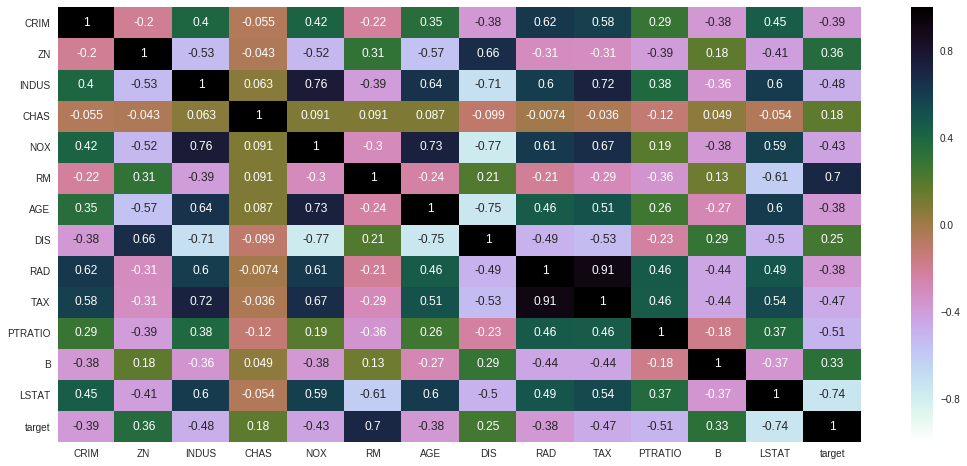

In [14]:
correlations = boston.corr()
plt.figure(figsize=(18,8)) 
sns.heatmap(correlations,annot=True,cmap='cubehelix_r')
plt.show()

We can observe that the features 'TAX' and 'RAD' are highly correlated. First, we will train the algorithms with all the features and measure the accuracy. Then we will drop one of the correlated features and again measure the accuracy of the algorithm. This model may achieve a better accuracy.

The next step is to identify if there are any outliers in the values of the features, something that could cause the algorithms to not behave as intended. If there are outliers, we have to consider removing them, BUT we have to be very careful and try to understand if the provided outlier is a value that is wrong or just a value that is possible to appear in real life but is rather rare. Here, the features 'CRIM', 'ZN', 'CHAS' and 'B' seem to contain some outliers but as we have no idea if they are values that can exist or not, we will take no action against them.

In [15]:
boston.skew()

CRIM       5.237578
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
target     1.108098
dtype: float64

The next graphs are histograms that give us an insight of the distribution each attribute follows. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin. Here, there are clearly different distributions for each feature.

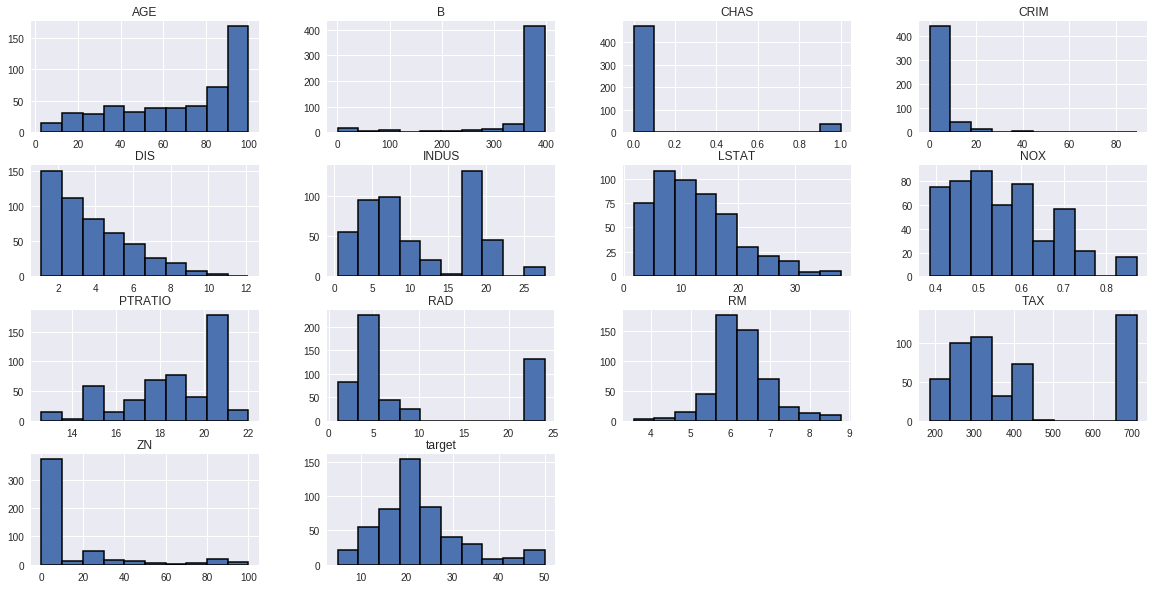

In [16]:
boston.hist(edgecolor='black', linewidth=1.5)
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

Next step is to create boxplots. A box plot shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers”. We are also adding a layer of individual points on top of it through Seaborn's striplot. We'll use jitter=True so that all the points don't fall in single vertical lines above the classes. As we can observe there are ouliers in the features we mentioned above. 

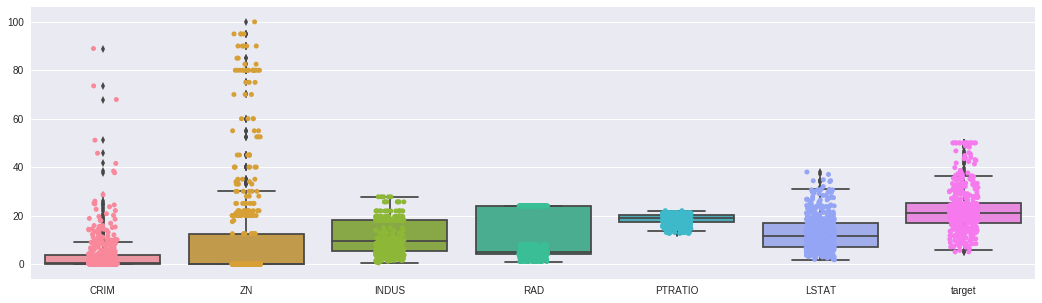

In [17]:
boston_box = boston.drop(['TAX'], axis = 1)
boston_box = boston_box.drop(['B'], axis = 1)
boston_box = boston_box.drop(['AGE'], axis = 1)
boston_box = boston_box.drop(['CHAS'], axis = 1)
boston_box = boston_box.drop(['NOX'], axis = 1)
boston_box = boston_box.drop(['RM'], axis = 1)
boston_box = boston_box.drop(['DIS'], axis = 1)
plt.figure(figsize=(18,5))
ax = sns.boxplot(data=boston_box)
ax = sns.stripplot(data=boston_box, jitter=True, edgecolor="gray")
plt.show()

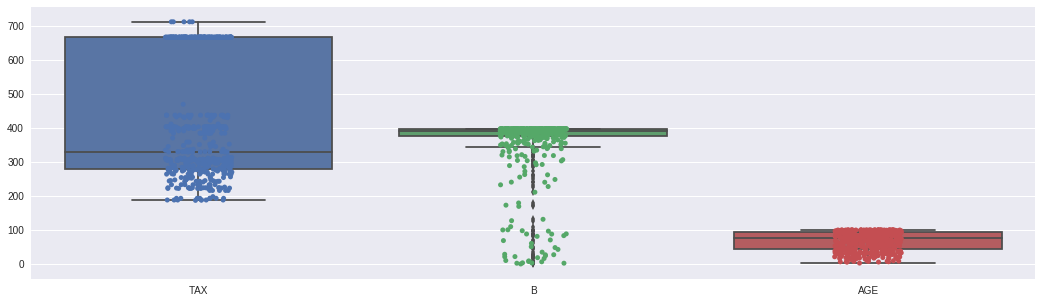

In [18]:
boston_box = boston[['TAX', 'B', 'AGE']]
plt.figure(figsize=(18,5))
ax = sns.boxplot(data=boston_box)
ax = sns.stripplot(data=boston_box, jitter=True, edgecolor="gray")
plt.show()

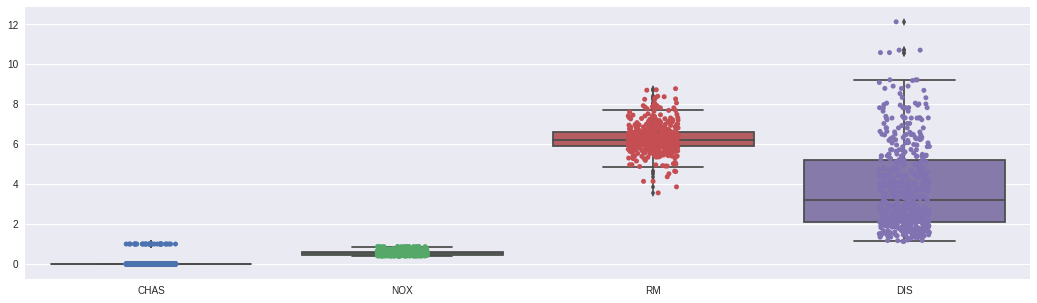

In [19]:
boston_box = boston[['CHAS', 'NOX', 'RM', 'DIS']]
plt.figure(figsize=(18,5))
ax = sns.boxplot(data=boston_box)
ax = sns.stripplot(data=boston_box, jitter=True, edgecolor="gray")
plt.show()

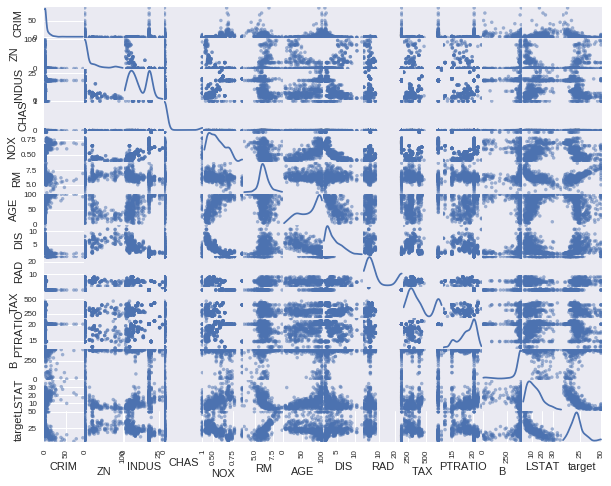

In [20]:
scatter_matrix(boston, figsize=(10,8), diagonal='kde')
plt.show()

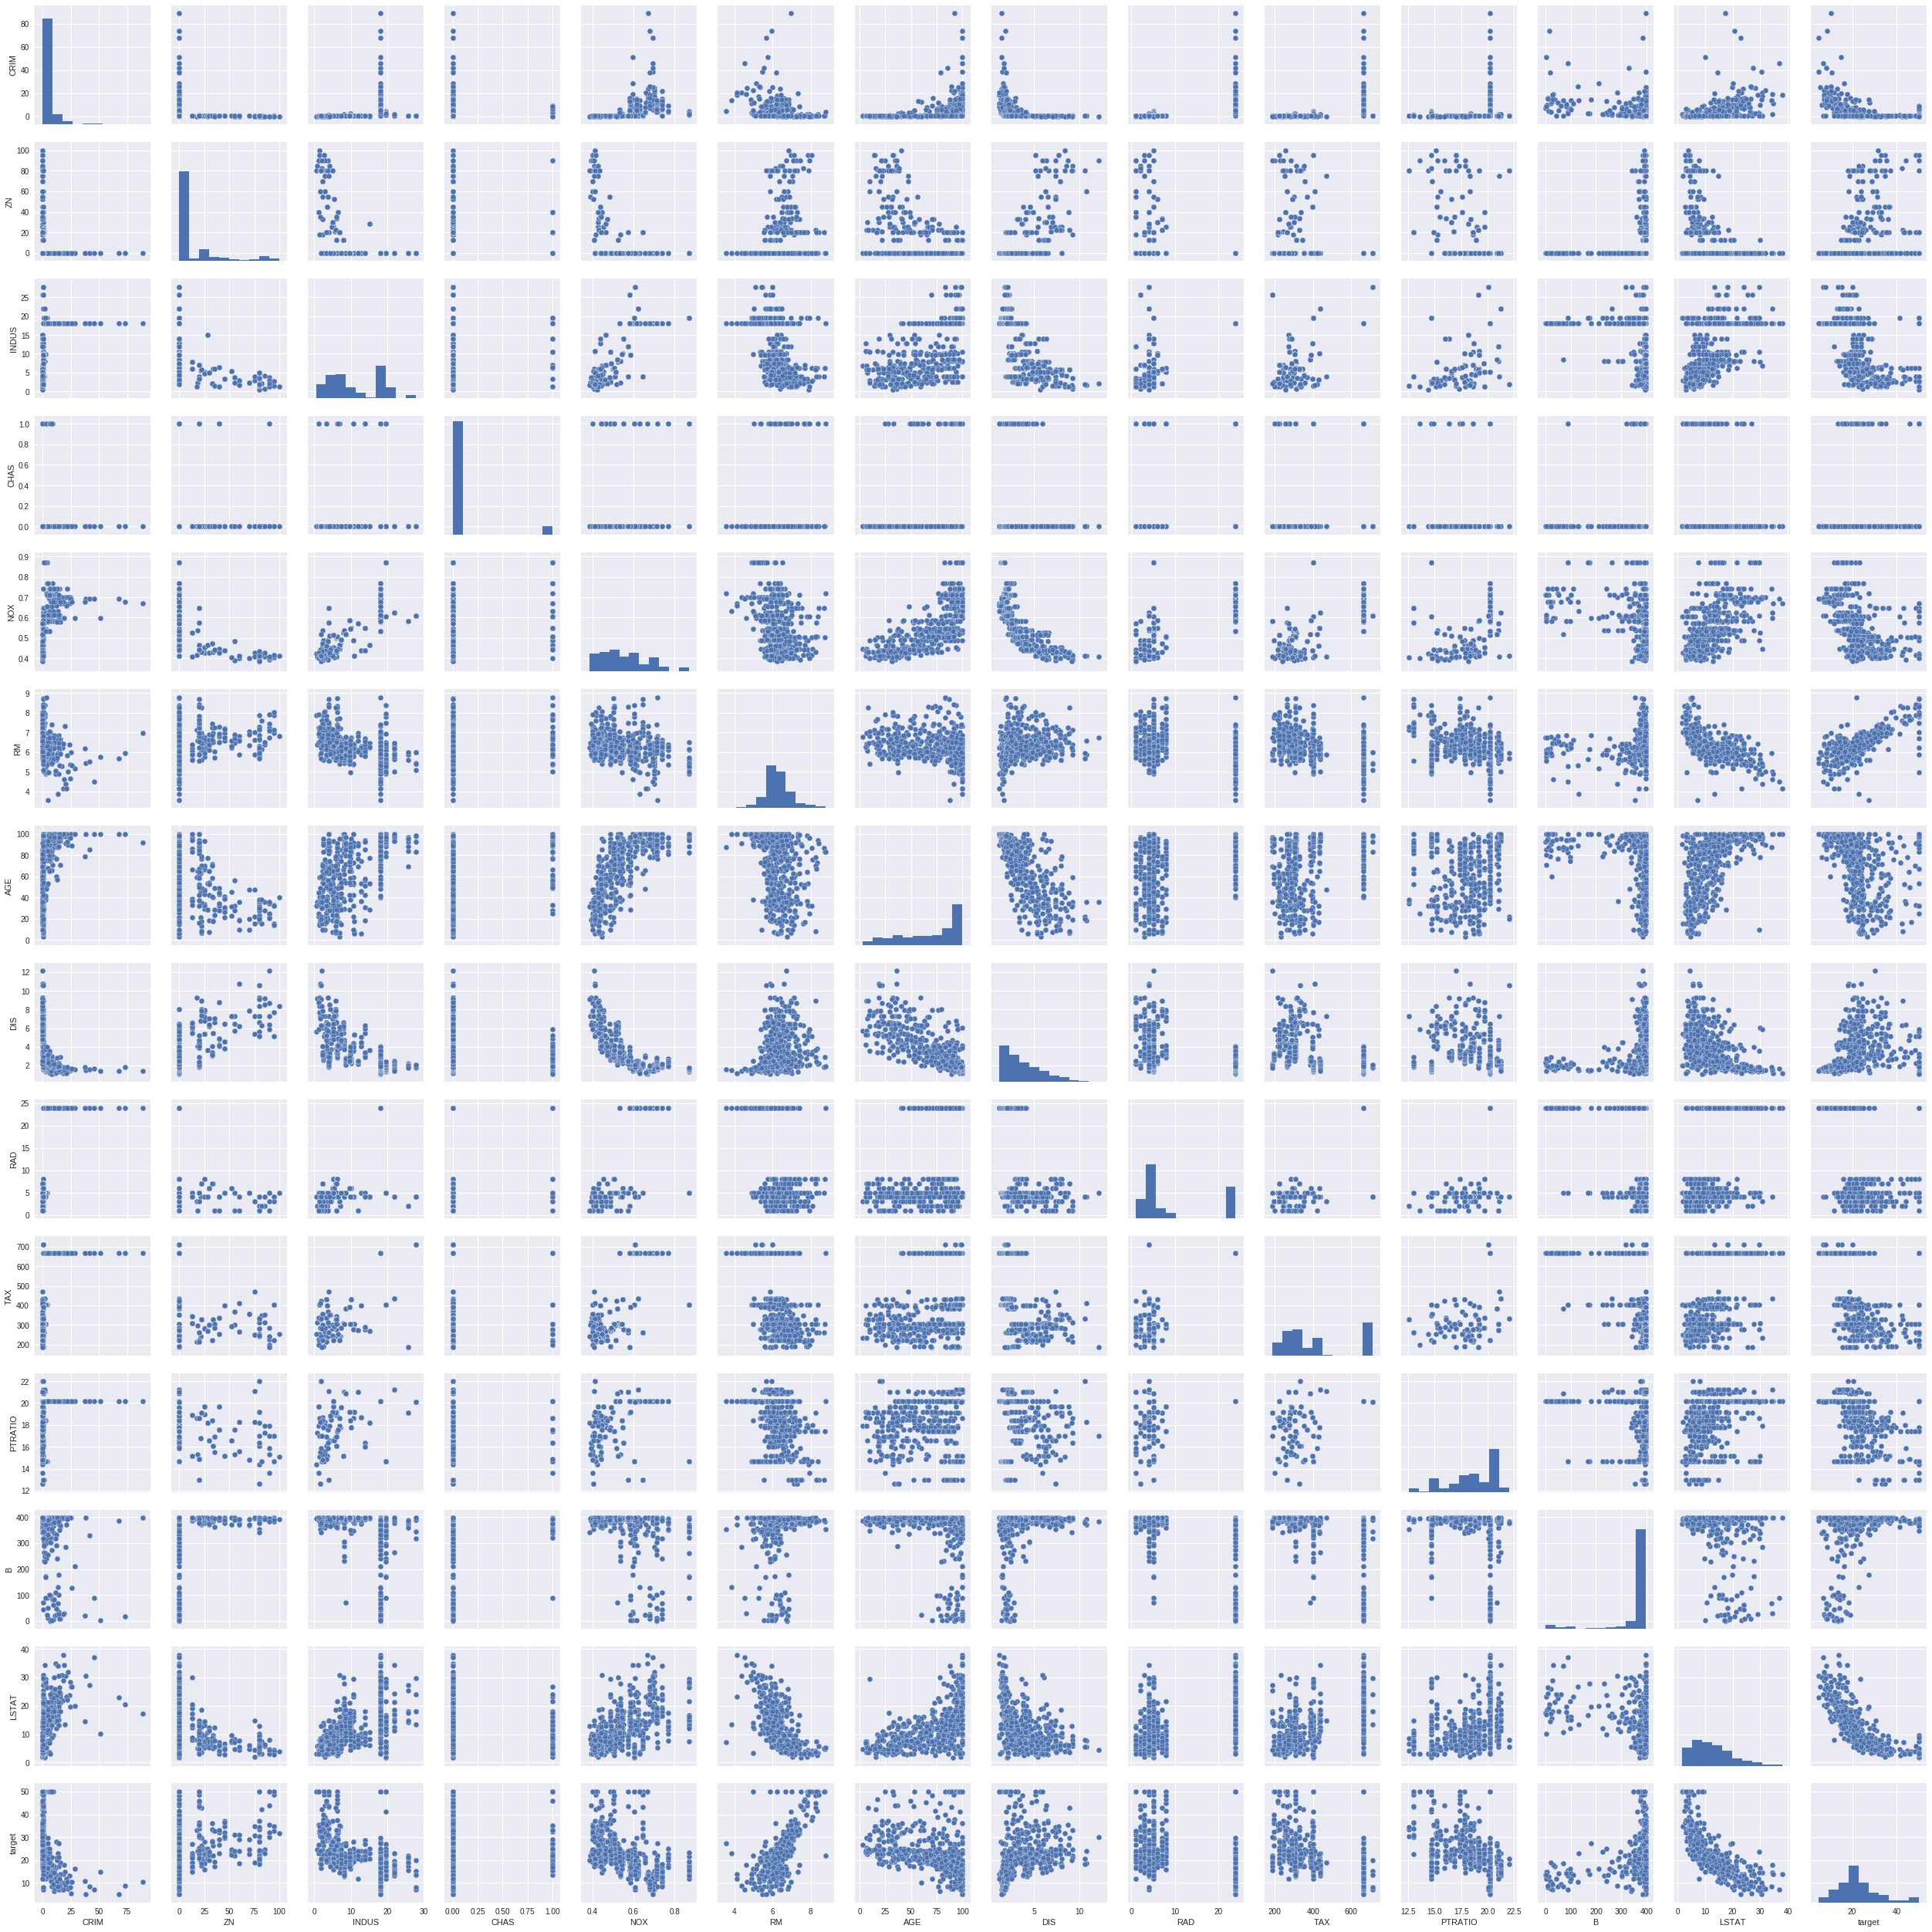

In [21]:
sns.pairplot(boston)
plt.show()

### Step 4: Prepare Data

##### Data Cleaning/Data Wrangling/Collect more data (if necessary).


The next step is to prepare our data for the application of the algorithms. This step contains cleaning, wrangling and collecting more of tha data. We will perform standardization and normalization to the data.

In [22]:
boston_X = boston.drop(['target'], axis = 1)
Y = boston['target']
scaler = StandardScaler()
scaled_X = scaler.fit_transform(boston_X)

In [23]:
boston_X_scaled = pd.DataFrame(scaled_X, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT'])

In [24]:
normalizer = Normalizer()
norm_X = normalizer.fit_transform(scaled_X)
type(norm_X)

numpy.ndarray

In [25]:
boston_X_norm = pd.DataFrame(norm_X, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT'])

### Step 5: Feature Engineering

##### Feature selection/feture engineering (as in new features)/data transformations.

Our next step is Feature Engineering, in which a selection or a transformation of the features is being done. In our case, firstly we will not be making selection of the features, but as we mentioned above, because of the high correlation between the features 'TAX' and 'RAD', we will perform the same experiment without one of them, to access the accuracy. 

So we will create a sub-dataset that will contain one of this features.

In [26]:
boston_X_feat = boston_X.drop(['RAD'], axis = 1)
boston_X_feat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,311.0,15.2,386.71,17.10


### Step 6: Algorithm Selection

##### Select a set of algorithms to apply, select evaluation metrics, and evaluate/compare algorithms.

Our next step is to apply a set of algorithms and select the best model. As we have already observed, this is a regression problem, because the 'classes' are continuous values.

We are going to compare a set of algorithms:

1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. ElasticNet Regression
5. k-Neighbors Regression
6. Regression Trees
7. Support Vector Machines

In [27]:
models = []
models.append(('LR',      LinearRegression()))
models.append(('RIDGE',   Ridge()))
models.append(('LASSO',   Lasso()))
models.append(('ELASTIC', ElasticNet()))
models.append(('kNR',     KNeighborsRegressor()))
models.append(('DT',      DecisionTreeRegressor()))
models.append(('SVM',     SVR()))

# The scoring function to use
scoring = 'neg_mean_squared_error'

We are going to perform the experiment with the whole dataset, thus all 13 features non-scaled and non-normalized

In [28]:
results = []
names   = []
kfold = KFold(n_splits=10, random_state=8)
for name, model in models:
    cv_results = cross_val_score(model, boston_X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%010s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

        LR: -34.763092 (+/- 45.613653)
     RIDGE: -34.135235 (+/- 45.951208)
     LASSO: -34.468099 (+/- 27.886469)
   ELASTIC: -31.163471 (+/- 22.705972)
       kNR: -107.286839 (+/- 79.839529)
        DT: -35.811079 (+/- 26.093409)
       SVM: -91.047824 (+/- 71.101574)


<IPython.core.display.Javascript object>


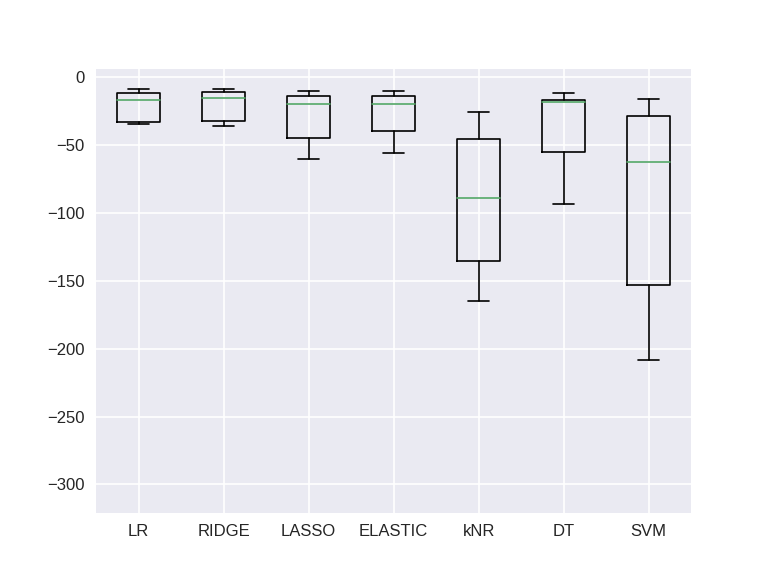

In [29]:
%matplotlib notebook

plt.boxplot(results)
plt.xticks(list(range(1,len(names)+1)), names)
plt.show()

Now, we will perform the same experiment with the scaled data

In [30]:
results = []
names   = []
kfold = KFold(n_splits=10, random_state=8)
for name, model in models:
    cv_results = cross_val_score(model, boston_X_scaled, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%010s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

        LR: -34.763092 (+/- 45.613653)
     RIDGE: -34.610802 (+/- 45.458388)
     LASSO: -37.862851 (+/- 40.589106)
   ELASTIC: -37.298298 (+/- 36.084789)
       kNR: -28.584596 (+/- 25.458626)
        DT: -36.957385 (+/- 30.861745)
       SVM: -38.586539 (+/- 38.008841)


<IPython.core.display.Javascript object>


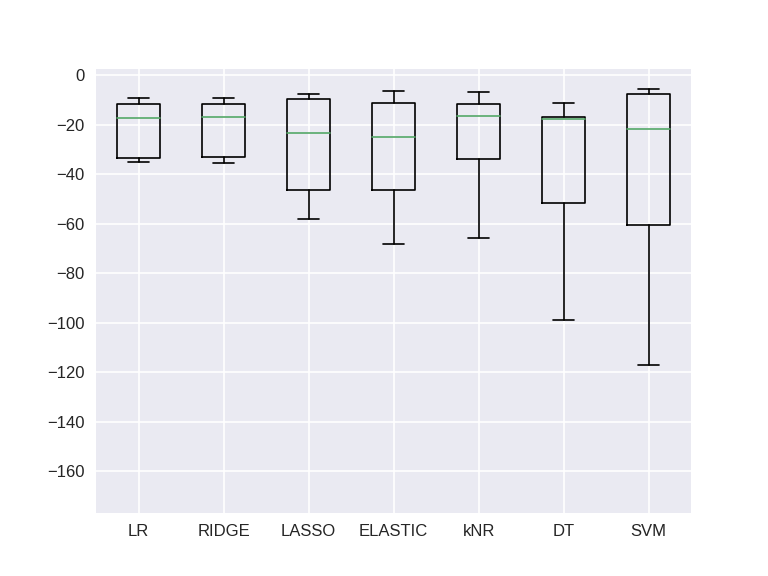

In [31]:
%matplotlib notebook

plt.boxplot(results)
plt.xticks(list(range(1,len(names)+1)), names)
plt.show()

Then we perform the experiment with normalized data

In [32]:
results = []
names   = []
kfold = KFold(n_splits=10, random_state=8)
for name, model in models:
    cv_results = cross_val_score(model, boston_X_norm, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%010s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

        LR: -40.693309 (+/- 36.230112)
     RIDGE: -39.576523 (+/- 35.594372)
     LASSO: -67.580308 (+/- 57.288645)
   ELASTIC: -76.137594 (+/- 58.878942)
       kNR: -30.257470 (+/- 22.678253)
        DT: -41.945611 (+/- 40.931524)
       SVM: -52.503832 (+/- 47.328587)


<IPython.core.display.Javascript object>


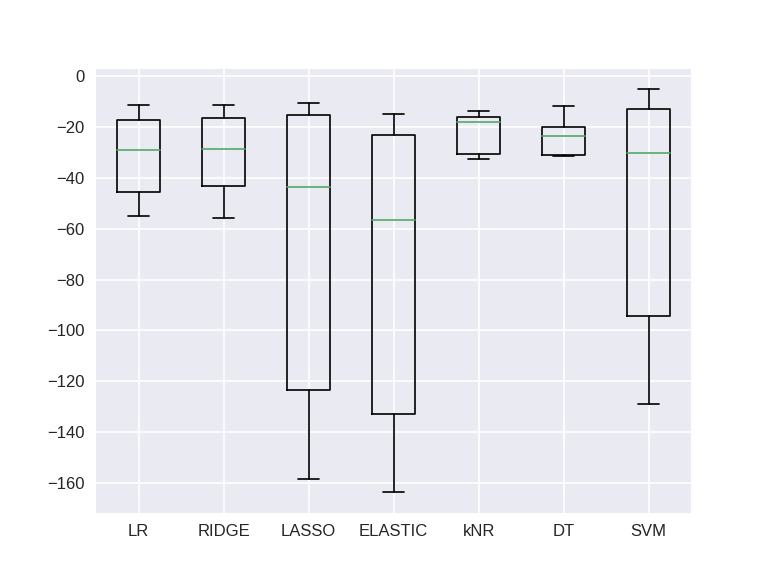

In [33]:
%matplotlib notebook

plt.boxplot(results)
plt.xticks(list(range(1,len(names)+1)), names)
plt.show()

Lastly, we perform the experiment with the data that has 'dropped' one of the correlated feature

In [34]:
results = []
names   = []
kfold = KFold(n_splits=10, random_state=8)
for name, model in models:
    cv_results = cross_val_score(model, boston_X_feat, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%010s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

        LR: -35.495779 (+/- 48.114609)
     RIDGE: -34.930103 (+/- 48.157719)
     LASSO: -35.833651 (+/- 29.339907)
   ELASTIC: -32.566809 (+/- 23.516428)
       kNR: -107.749392 (+/- 79.663747)
        DT: -41.942754 (+/- 29.500449)
       SVM: -91.134834 (+/- 71.195792)


<IPython.core.display.Javascript object>


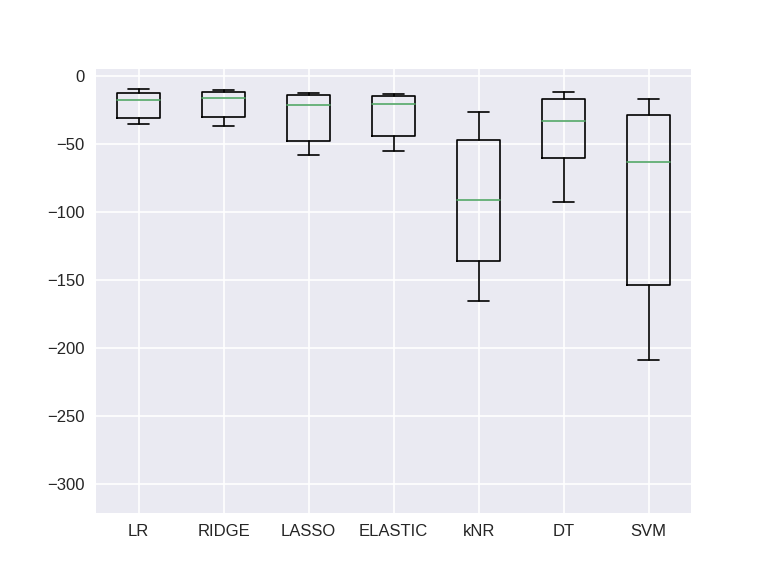

In [35]:
%matplotlib notebook

plt.boxplot(results)
plt.xticks(list(range(1,len(names)+1)), names)
plt.show()

From the results we can conclude that the best algorithm for our dataset is kNR with the dataset from which we have removed one of the correlated features.

### Step 7: Model Training

##### Apply ensembles and improve performance by hyperparameter optimisation.

Now that we have chosen the algorithm with the least mean squared error, we are going test it. We split the data to see how well the algorithm can perform, by the mean squared error.

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(boston_X_feat, Y, test_size=0.2, random_state=8)

In [37]:
kNR = KNeighborsRegressor()
model = kNR.fit(X_train, Y_train)

In [38]:
predictions = model.predict(X_test)
print "Mean squared error for test data is", mean_squared_error(Y_test, predictions)

Mean squared error for test data is 42.7635568627


Now we are going to perform a grid search to find better values for KNN's hyperparameters, to achieve a better accuracy, thus to minimize the mean squared error.

In [39]:
kNR.get_params().keys()

['n_neighbors',
 'n_jobs',
 'algorithm',
 'metric',
 'metric_params',
 'p',
 'weights',
 'leaf_size']

In [40]:
param_grid = {"n_neighbors": [3,5, 10],
              "metric": ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
              "weights": ['uniform', 'distance'],
              "leaf_size": [10, 20, 30],
              "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']
             }

grid_search = GridSearchCV(kNR, param_grid=param_grid)
grid_model = grid_search.fit(X_train, Y_train)
predictions = grid_model.predict(X_test)
print "Mean squared error for test data is", mean_squared_error(Y_test, predictions)

Mean squared error for test data is 32.0673529887


As we can see, the error is lower than before and that means that grid search has found better values for our hyperparameters.